<a href="https://colab.research.google.com/github/HssahSaad/Week_5/blob/main/Time_Series_Forecasting_Practical_Evaluation_Hssah_Alsherihi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

# Model 1: LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras

# Model 2: ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Evaluate the model:
from sklearn.metrics import mean_absolute_error

In [2]:
# Load the dataset
df = pd.read_csv('/content/Traffic Data.csv')

In [3]:
# Explor the data
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [4]:
# Dataset Date Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


*   Convert the `date_time` column



In [5]:
# Convert date_time column to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Set date_time as index
df.set_index('date_time', inplace=True)

In [6]:
# check the missing values
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [7]:
# Handeling the null values
df = df.dropna(subset=['traffic_volume'])

In [8]:
# check the missing values again
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [9]:
# check the duplicate
df.duplicated().sum()

18

In [10]:
# Drop the duplicated
df = df.drop_duplicates()

In [11]:
# check the duplicate again
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

* Plot the Time Series Data

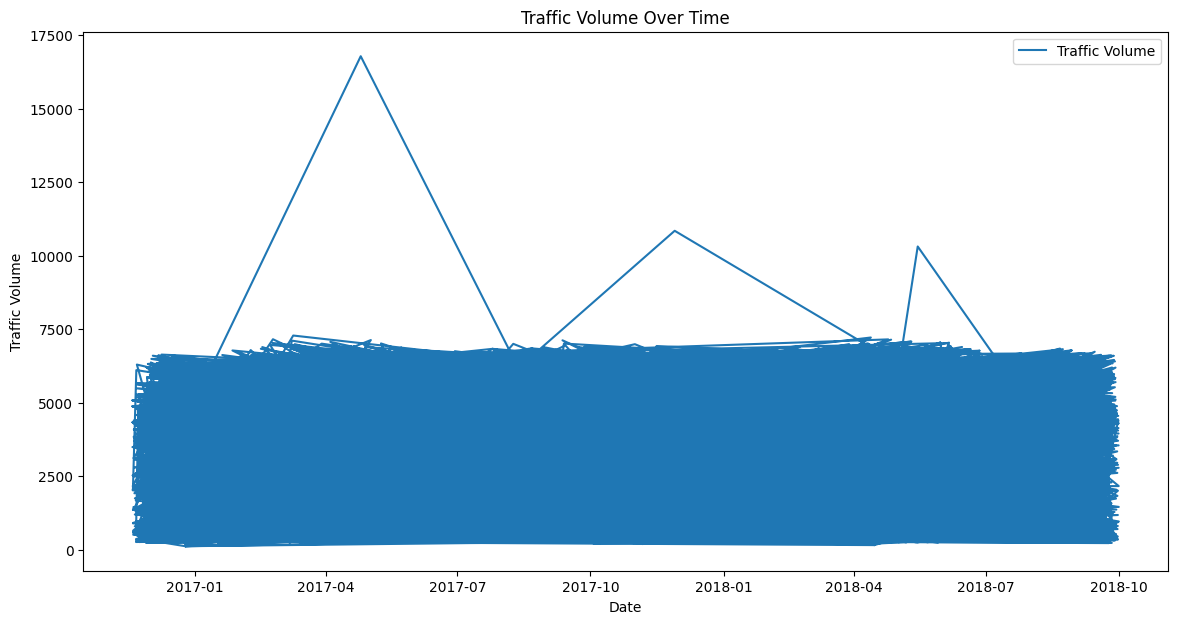

In [12]:
# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(df['traffic_volume'], label='Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

* Seasonal decomposition

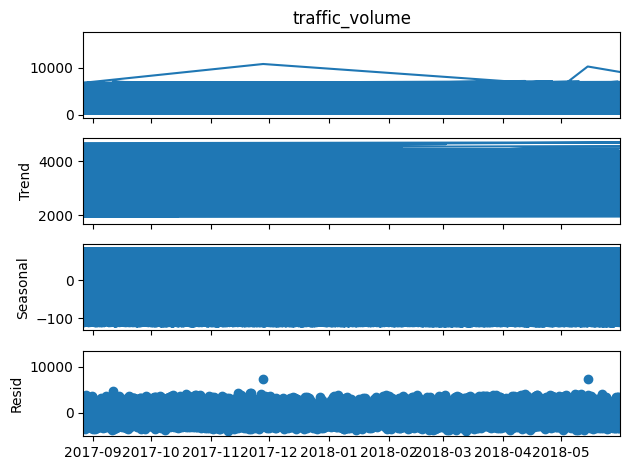

In [13]:
# Seasonal decomposition
decomposition = seasonal_decompose(df['traffic_volume'], model='additive', period=24)
decomposition.plot()
plt.show()

The seasonal decomposition does not show any trends, or seasonality of the data

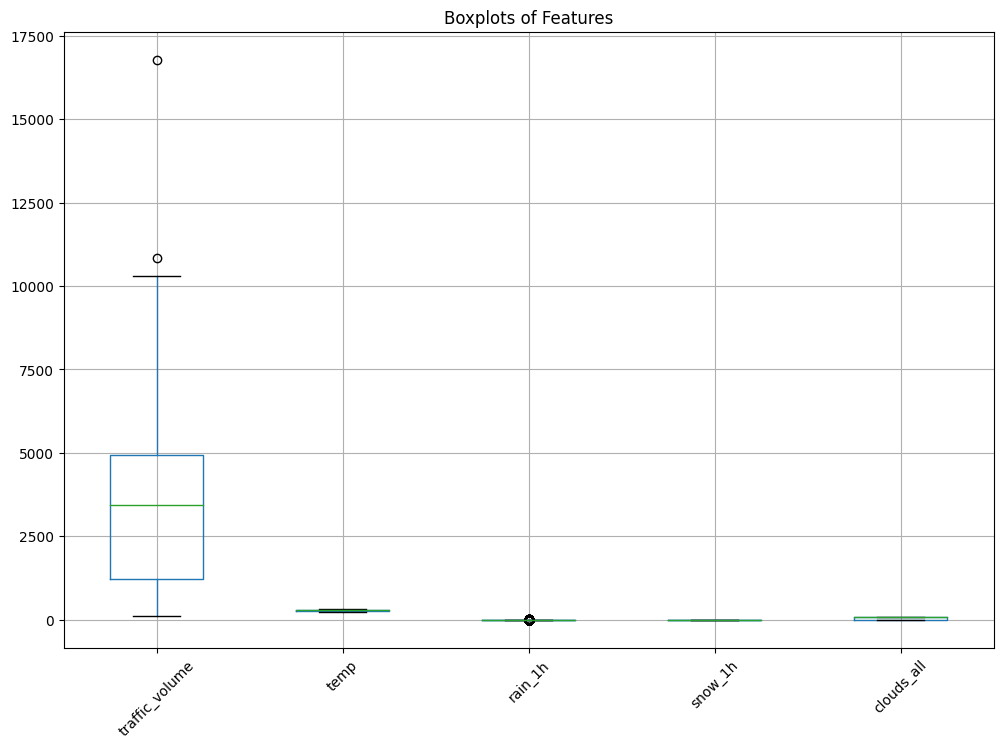

In [14]:
# Boxplots for each feature to identify outliers
plt.figure(figsize=(12, 8))
df[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description']].boxplot()
plt.title('Boxplots of Features')
plt.xticks(rotation=45)
plt.show()

In `traffic_volume` there are outliers

In [15]:
# Remove the outliers

Q1 = df['traffic_volume'].quantile(0.25)
Q3 = df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['traffic_volume'] >= lower_bound) &
                                                (df['traffic_volume'] <= upper_bound)]


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

### Already handeled the missing data up

* Craete Lags Feature

In [16]:
# Create lag features
df['traffic_volume_lag1'] = df['traffic_volume'].shift(1)
df['traffic_volume_lag2'] = df['traffic_volume'].shift(2)

<ipython-input-16-88ad66c3ec4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume_lag1'] = df['traffic_volume'].shift(1)
<ipython-input-16-88ad66c3ec4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume_lag2'] = df['traffic_volume'].shift(2)


* Create moving average Feature

In [17]:
# Create a moving average feature
df['traffic_volume_ma7'] = df['traffic_volume'].rolling(window=7).mean()

<ipython-input-17-e434e9e972a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume_ma7'] = df['traffic_volume'].rolling(window=7).mean()


* Make sure the dates are sorted correctly

In [18]:
df = df.sort_index()

* drop unnecessary columns

In [19]:
df['weather_main'].value_counts()

,count
weather_main,
Clear,5597
Clouds,5228
Mist,2752
Rain,2240
Snow,1460
Drizzle,990
Haze,672
Thunderstorm,541
Fog,477


In [20]:
df['weather_description'].value_counts()

,count
weather_description,
sky is clear,5497
mist,2752
overcast clouds,1736
broken clouds,1573
scattered clouds,1456
light snow,1246
light rain,1198
moderate rain,747
haze,672


In [21]:
df = df.drop(columns=['weather_description','weather_main'])

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


* Shift method

In [22]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

* Difference between traffic_volume

In [23]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()

* Date Features

1. Day of the week

In [24]:
df['day_of_week'] = df.index.dayofweek

2. Month

In [25]:
df['month'] = df.index.month

3. Day of the year

In [26]:
df['day_of_year'] = df.index.dayofyear

In [27]:
df.dtypes

,0
traffic_volume,float64
temp,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64
traffic_volume_lag1,float64
traffic_volume_lag2,float64
traffic_volume_ma7,float64
prev_traffic_volume,float64
traffic_volume_diff,float64


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [28]:
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [29]:
train

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,traffic_volume_lag1,traffic_volume_lag2,traffic_volume_ma7,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
date_time,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,6038.0,316.0,3777.142857,NaN,NaN,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3403.0,3893.0,4563.714286,4872.0,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,3253.0,2716.0,2609.428571,4872.0,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,775.0,2915.0,3308.000000,4872.0,202.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,3071.0,353.0,2645.142857,5074.0,0.0,4,11,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-18 22:00:00,2728.0,296.35,0.0,0.0,1,4654.0,2466.0,3917.000000,3196.0,-468.0,4,5,138
2018-05-18 22:00:00,2728.0,296.35,0.0,0.0,1,354.0,2753.0,2899.857143,2728.0,0.0,4,5,138
2018-05-18 23:00:00,1797.0,295.37,0.0,0.0,1,4515.0,4658.0,2927.285714,2728.0,-931.0,4,5,138


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [30]:

# Initialize the scaler
scaler = MinMaxScaler()

# Copy the DataFrames
train_scaled = train.copy()
test_scaled = test.copy()

# Select only numeric columns for scaling
numeric_columns = train.select_dtypes(include=[np.number]).columns

# scaling
train_scaled[numeric_columns] = scaler.fit_transform(train[numeric_columns])
test_scaled[numeric_columns] = scaler.transform(test[numeric_columns])

# Display the scaled training data
print(train_scaled.head())


                     traffic_volume      temp  rain_1h  snow_1h  clouds_all  \
date_time                                                                     
2016-11-18 15:00:00        0.466752  0.482320      0.0      0.0    0.978261   
2016-11-18 15:00:00        0.466752  0.482320      0.0      0.0    0.978261   
2016-11-18 15:00:00        0.466752  0.482320      0.0      0.0    0.978261   
2016-11-18 16:00:00        0.486563  0.478548      0.0      0.0    0.978261   
2016-11-18 16:00:00        0.486563  0.478548      0.0      0.0    0.978261   

                     traffic_volume_lag1  traffic_volume_lag2  \
date_time                                                       
2016-11-18 15:00:00             0.581110             0.019910   
2016-11-18 15:00:00             0.322676             0.370734   
2016-11-18 15:00:00             0.307964             0.255296   
2016-11-18 16:00:00             0.064927             0.274814   
2016-11-18 16:00:00             0.290114             0.0

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

* For the model selection the first model to select is [ LSTM ]

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [31]:
# Prepare the data for LSTM
def create_lstm_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

look_back = 1
X_train, Y_train = create_lstm_dataset(train_scaled['traffic_volume'].values, look_back)
X_test, Y_test = create_lstm_dataset(test_scaled['traffic_volume'].values, look_back)

In [32]:
# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [33]:
# Building the model
model = Sequential()
model.add(GRU(256, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.3))
model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(64))
model.add(Dropout(0.3))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')

In [35]:
# Train the model with a larger batch size
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
499/499 - 5s - 11ms/step - loss: 0.0677
Epoch 2/50
499/499 - 2s - 4ms/step - loss: 0.0589
Epoch 3/50
499/499 - 2s - 4ms/step - loss: 0.0573
Epoch 4/50
499/499 - 2s - 4ms/step - loss: 0.0549
Epoch 5/50
499/499 - 2s - 4ms/step - loss: 0.0555
Epoch 6/50
499/499 - 2s - 4ms/step - loss: 0.0549
Epoch 7/50
499/499 - 2s - 4ms/step - loss: 0.0543
Epoch 8/50
499/499 - 2s - 4ms/step - loss: 0.0543
Epoch 9/50
499/499 - 2s - 4ms/step - loss: 0.0541
Epoch 10/50
499/499 - 2s - 4ms/step - loss: 0.0538
Epoch 11/50
499/499 - 2s - 4ms/step - loss: 0.0533
Epoch 12/50
499/499 - 2s - 4ms/step - loss: 0.0535
Epoch 13/50
499/499 - 2s - 4ms/step - loss: 0.0532
Epoch 14/50
499/499 - 2s - 4ms/step - loss: 0.0528
Epoch 15/50
499/499 - 2s - 4ms/step - loss: 0.0526
Epoch 16/50
499/499 - 2s - 4ms/step - loss: 0.0525
Epoch 17/50
499/499 - 2s - 4ms/step - loss: 0.0524
Epoch 18/50
499/499 - 2s - 4ms/step - loss: 0.0527
Epoch 19/50
499/499 - 2s - 4ms/step - loss: 0.0523
Epoch 20/50
499/499 - 2s - 4ms/step - l

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [36]:
# Make predictions
gru_predictions = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [37]:
# Calculate RMSE
gru_mae = np.sqrt(mean_absolute_error(Y_test, gru_predictions))
print(f'GRU RMSE: {gru_mae}')

GRU RMSE: 0.21452884055265004


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

* For the next model [ ARIMA ]

In [38]:
# Fit the ARIMA model
arima_order = (5, 1, 0)
arima_model = ARIMA(train_scaled['traffic_volume'], order=arima_order)
arima_model_fit = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [39]:
# Make predictions
arima_predictions = arima_model_fit.forecast(steps=len(test_scaled))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [40]:
# Calculate RMSE
arima_mae = mean_absolute_error(test_scaled['traffic_volume'], arima_predictions)
print(f'ARIMA RMSE: {arima_mae}')

ARIMA RMSE: 0.2618417733729412


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

* In preparing the data, I used "MinMaxScaler"  to ensure all features were on a similar scale.
* For Handling missing values I drop the null values in the target variable.
*For feature engineering, I created lagged variables and moving averages to capture temporal patterns in the data.

# About the first model:

* In the GRU model, I choose 32 for the batch size and 50 epochs to balance training time and model performance, and for the optimizer I choose Adam. For the evaluation of the model, I choose MAE.
 I tried different hyperparameters to find the best loss value the shold be close to zero

# Abut the second model

* In the ARIMA model, I tried different ARIMA configurations (p, d, q) to find the best fit for the data. For the evaluation of the model, I choose MAE.